In [1]:
import numpy as np
from itertools import combinations

def discrete_morse_function(K, seed=None):
    """
    Creates a discrete Morse function on the simplicial complex K.
    :param K: A list of simplices (each simplex is a tuple or list).
    :param seed: An optional integer seed for reproducibility.
    :return: A dictionary with simplices as keys and their discrete Morse function values.
    """
    if seed is not None:
        np.random.seed(seed)
    weights = {tuple(simplex): np.random.rand() for simplex in K}
    return weights

def identify_critical_cells(K, morse_function):
    """
    Identifies critical cells in a simplicial complex given a discrete Morse function.
    :param K: A list of simplices representing the simplicial complex.
    :param morse_function: A dictionary representing the discrete Morse function.
    :return: A list of critical simplices.
    """
    critical_cells = []
    for simplex in K:
        simplex_tuple = tuple(simplex)  # Use tuple representation for consistency
        faces = combinations(simplex_tuple, len(simplex_tuple) - 1) if len(simplex_tuple) > 1 else []
        # Check if simplex is critical
        if not any(
            morse_function.get(tuple(face), float('inf')) <= morse_function[simplex_tuple]
            for face in faces
        ):
            critical_cells.append(simplex)
    return critical_cells

def construct_forman_gradient_field(K, morse_function):
    """
    Constructs the Forman gradient vector field based on a discrete Morse function.
    :param K: A list of simplices representing the simplicial complex.
    :param morse_function: A dictionary representing the discrete Morse function.
    :return: A pairing of simplices in a gradient field.
    """
    gradient_field = {}
    for simplex in K:
        simplex_tuple = tuple(simplex)
        # Attempt to pair simplex with a coface
        for coface in K:
            coface_tuple = tuple(coface)
            if set(simplex_tuple).issubset(coface_tuple) and len(coface_tuple) == len(simplex_tuple) + 1:
                if morse_function[simplex_tuple] > morse_function[coface_tuple]:
                    gradient_field[simplex_tuple] = coface_tuple
                    break
    return gradient_field

In [2]:
# Example Usage
K_example = [['1'], ['2'], ['3'], ['1', '2'], ['2', '3'], ['1', '3'], ['1', '2', '3']]
K_example = [tuple(s) for s in K_example]  # Convert to tuples for consistency
morse_function = discrete_morse_function(K_example, seed=42)  # Optional seed for reproducibility
critical_cells = identify_critical_cells(K_example, morse_function)
forman_gradient = construct_forman_gradient_field(K_example, morse_function)

print("Discrete Morse Function:", morse_function)
print("Critical Cells:", critical_cells)
print("Forman Gradient Field:", forman_gradient)

Discrete Morse Function: {('1',): 0.3745401188473625, ('2',): 0.9507143064099162, ('3',): 0.7319939418114051, ('1', '2'): 0.5986584841970366, ('2', '3'): 0.15601864044243652, ('1', '3'): 0.15599452033620265, ('1', '2', '3'): 0.05808361216819946}
Critical Cells: [('1',), ('2',), ('3',), ('2', '3'), ('1', '3'), ('1', '2', '3')]
Forman Gradient Field: {('1',): ('1', '3'), ('2',): ('1', '2'), ('3',): ('2', '3'), ('1', '2'): ('1', '2', '3'), ('2', '3'): ('1', '2', '3'), ('1', '3'): ('1', '2', '3')}


In [3]:
import numpy as np
from collections import defaultdict

def construct_filtration(data_points, functions, parameters):
    """
    Construct multidimensional filtration from given data and functions.
    :param data_points: Dataset in metric space.
    :param functions: List of functions defining the filtration.
    :param parameters: Filtration parameters.
    :return: Filtration dictionary.
    """
    filtration = defaultdict(list)
    for point in data_points:
        sublevel_set = tuple(function(point) <= param for function, param in zip(functions, parameters))
        filtration[sublevel_set].append(point)
    return dict(filtration)

def compute_boundary_operator(k_chain):
    """
    Compute the boundary operator for given k-chains.
    :param k_chain: A k-chain element of a simplicial complex.
    :return: Resultant boundary of the k-chain.
    """
    boundary = []
    for i in range(len(k_chain)):
        boundary_elem = tuple(elem for j, elem in enumerate(k_chain) if j != i)
        boundary.append(boundary_elem)
    return boundary

def calculate_rank_invariant(filtration):
    """
    Calculate rank invariant from the multidimensional filtration.
    :param filtration: Filtration representation as a dictionary.
    :return: Rank invariant as a matrix.
    """
    keys = list(filtration.keys())
    rank_invariant = np.zeros((len(keys), len(keys)))

    for idx_a, a in enumerate(keys):
        for idx_b, b in enumerate(keys):
            if all(a_val <= b_val for a_val, b_val in zip(a, b)):
                rank_invariant[idx_a, idx_b] = len(filtration[a])  # Placeholder for rank calculation
    return rank_invariant

def assemble_persistence_diagrams(rank_invariant):
    """
    Assemble persistence diagrams from the rank invariants.
    :param rank_invariant: Rank invariant matrix.
    :return: Persistence diagrams.
    """
    persistence_diagrams = []
    for i in range(rank_invariant.shape[0]):
        for j in range(i + 1, rank_invariant.shape[1]):
            if rank_invariant[i, j] > 0:
                persistence_diagrams.append((i, j, rank_invariant[i, j]))
    return persistence_diagrams

In [4]:
# Example dataset setup
data_points = np.random.rand(10, 2)  # Random points in 2D space

# Define multiple functions for a multidimensional perspective
functions = [lambda x: x[0] * 2, lambda x: x[1] ** 2]

# Define filtration parameters
parameters = [1, 1]

# Construct filtration
filtration = construct_filtration(data_points, functions, parameters)

# Calculate rank invariant
rank_inv = calculate_rank_invariant(filtration)

# Assemble persistence diagrams
persistence_diagrams = assemble_persistence_diagrams(rank_inv)

# Display results
print("Filtration:", filtration)
print("Rank Invariant:\n", rank_inv)
print("Persistence Diagrams:", persistence_diagrams)

Filtration: {(False, True): [array([0.86617615, 0.60111501]), array([0.70807258, 0.02058449]), array([0.96990985, 0.83244264]), array([0.52475643, 0.43194502]), array([0.78517596, 0.19967378])], (True, True): [array([0.21233911, 0.18182497]), array([0.18340451, 0.30424224]), array([0.29122914, 0.61185289]), array([0.13949386, 0.29214465]), array([0.36636184, 0.45606998])]}
Rank Invariant:
 [[5. 5.]
 [0. 5.]]
Persistence Diagrams: [(0, 1, 5.0)]


In [5]:
import numpy as np

class ZigzagPersistence:
    def __init__(self, initial_complex):
        """
        Initialize the zigzag persistence with the initial simplicial complex.
        :param initial_complex: Starting simplicial complex.
        """
        self.complex_sequence = [initial_complex]
        self.barcode = []  # Format: [(birth, death), ...]

    def add_or_remove_simplex(self, simplex, operation):
        """
        Update the filtration sequence by adding or removing a simplex.
        :param simplex: Tuple representing the simplex (e.g., (0, 1, 2)).
        :param operation: "add" or "remove".
        """
        current_complex = self.complex_sequence[-1].copy()
        if operation == 'add':
            current_complex.add(simplex)
        elif operation == 'remove':
            current_complex.discard(simplex)
        else:
            raise ValueError("Operation must be 'add' or 'remove'.")
        self.complex_sequence.append(current_complex)

    def compute_homology_changes(self, complex1, complex2):
        """
        Analyze homology changes between two simplicial complexes.
        :param complex1: First simplicial complex in the sequence.
        :param complex2: Second simplicial complex in the sequence.
        :return: List of (birth, death) pairs.
        """
        # Placeholder: Replace with actual homology computation
        # You could use a library like GUDHI for this step.
        # Here we append a dummy pair for illustration.
        return [(np.random.rand(), np.random.rand() + 1)]  # Dummy values

    def construct_barcode(self):
        """
        Construct the persistence barcode by evaluating homology changes across time.
        """
        for idx in range(len(self.complex_sequence) - 1):
            complex1 = self.complex_sequence[idx]
            complex2 = self.complex_sequence[idx + 1]
            changes = self.compute_homology_changes(complex1, complex2)
            self.barcode.extend(changes)

    def get_barcode(self):
        """
        Return the persistence barcode.
        """
        return self.barcode

In [6]:
# Dummy example of a simplicial complex - typically more complex
initial_complex = {(0,), (1,), (2,), (0, 1), (1, 2)}
zz = ZigzagPersistence(initial_complex)

# Example modifications representing time-varying data adjustments
zz.add_or_remove_simplex((0, 2), 'add')
zz.add_or_remove_simplex((1,), 'remove')

# Construct the zigzag persistence barcode
zz.construct_barcode()

# Output the computed barcode
print("Zigzag Persistence Barcode:", zz.get_barcode())

Zigzag Persistence Barcode: [(0.5142344384136116, 1.5924145688620426), (0.046450412719997725, 1.6075448519014384)]


In [7]:
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE

def dimension_reduction(X, method='PCA', n_components=2):
    """
    Perform dimensionality reduction on a dataset.
    :param X: High-dimensional dataset.
    :param method: Reduction method ('PCA', 'Isomap', or 'LLE').
    :param n_components: Target dimensionality.
    :return: Reduced dataset.
    """
    if method == 'PCA':
        reduced_data = PCA(n_components=n_components).fit_transform(X)
    elif method == 'Isomap':
        reduced_data = Isomap(n_components=n_components).fit_transform(X)
    elif method == 'LLE':
        reduced_data = LLE(n_components=n_components).fit_transform(X)
    else:
        raise ValueError(f"Invalid method: {method}. Choose 'PCA', 'Isomap', or 'LLE'.")
    return reduced_data

def simplify_simplicial_complex(K):
    """
    Simplify a simplicial complex by removing non-persistent simplices.
    :param K: Initial simplicial complex.
    :return: Simplified simplicial complex.
    """
    # Placeholder: Implement logic based on persistence criteria or other rules.
    # For now, just return the complex as-is.
    return K

def discrete_morse_simplification(K):
    """
    Simplify a simplicial complex using discrete Morse theory.
    :param K: Initial simplicial complex.
    :return: Simplified complex preserving essential features.
    """
    # Placeholder: Implement discrete Morse simplification.
    return K

def compute_persistence(simplex):
    """
    Dummy persistence computation function.
    :param simplex: A simplex from the complex.
    :return: Dummy persistence length.
    """
    return np.random.rand()  # Replace with actual persistence calculation.

def persistent_homology_simplify(K, persistence_threshold):
    """
    Simplify based on persistent homology.
    :param K: Filtered simplicial complex.
    :param persistence_threshold: Threshold for persistence.
    :return: Simplified complex.
    """
    # Placeholder: Replace with real persistence homology computation.
    for simplex in K.copy():
        persistence_length = compute_persistence(simplex)
        if persistence_length < persistence_threshold:
            K.remove(simplex)
    return K

def topological_simplification_algorithm(K, epsilon):
    """
    Algorithm for topological simplification using persistence intervals.
    :param K: Initial simplicial complex.
    :param epsilon: Persistence interval threshold.
    :return: Simplified simplicial complex.
    """
    filtered_complex = persistent_homology_simplify(K, epsilon)
    simplified_complex = discrete_morse_simplification(filtered_complex)
    return simplified_complex

In [8]:
# Example dataset
X = np.random.rand(100, 50)  # 100 points in a 50-dimensional space

# Run dimensionality reduction
reduced_X = dimension_reduction(X, method='PCA', n_components=3)

# Example simplicial complex (placeholder)
initial_complex = [{(0,)}, {(1,)}, {(0, 1)}]  # Replace with a real complex

# Simplify using topological simplification
simplified_complex = topological_simplification_algorithm(initial_complex, epsilon=0.1)

print("Dimensionality reduced data shape:", reduced_X.shape)
print("Simplified simplicial complex:", simplified_complex)

Dimensionality reduced data shape: (100, 3)
Simplified simplicial complex: [{(0,)}, {(1,)}, {(0, 1)}]


In [9]:
import numpy as np
from sklearn.decomposition import PCA

def initialize_quantum_states(dim):
    """
    Initialize quantum states relevant for the dataset.
    :param dim: Dimensionality of the quantum state space.
    :return: Initialized quantum state (normalized complex vector).
    """
    # Create a random complex vector
    state_vector = np.random.random(dim) + 1j * np.random.random(dim)
    # Normalize the state vector
    norm = np.linalg.norm(state_vector)
    return state_vector / norm

def initialize_multiple_quantum_states(num_states, dim):
    """
    Generate multiple random quantum states.
    :param num_states: Number of quantum states to generate.
    :param dim: Dimensionality of each quantum state.
    :return: List of normalized quantum states.
    """
    quantum_states = []
    for _ in range(num_states):
        # Create a random complex vector
        state_vector = np.random.random(dim) + 1j * np.random.random(dim)
        # Normalize the state vector
        state_vector /= np.linalg.norm(state_vector)
        quantum_states.append(state_vector)
    return quantum_states

def compute_density_operator(state_vector):
    """
    Compute the density operator from a quantum state vector.
    :param state_vector: Quantum state vector.
    :return: Density operator (Hermitian matrix).
    """
    return np.outer(state_vector, np.conj(state_vector))

def calculate_quantum_invariant(density_op, observable):
    """
    Calculate quantum invariants for topological feature extraction.
    :param density_op: Density operator.
    :param observable: Observable to measure.
    :return: Quantum invariant value (expectation value).
    """
    return np.trace(density_op @ observable)

def prepare_entangled_states(state, entangle_matrix):
    """
    Prepare entangled quantum states for feature extraction.
    :param state: Initial quantum state.
    :param entangle_matrix: Matrix to create entanglement.
    :return: Entangled state (complex vector).
    """
    return entangle_matrix @ state

def dimension_reduction(features):
    """
    Perform dimensionality reduction on extracted features.
    :param features: Array of quantum features.
    :return: Reduced feature set.
    """
    if features.shape[0] < 2:
        print("Not enough samples for PCA. Returning original features.")
        return features  # No reduction possible
    pca = PCA(n_components=2)
    return pca.fit_transform(features)

In [10]:
# Example quantum topological feature extraction
dimensionality = 4

# Initialize quantum state
quantum_state = np.random.random(dimensionality) + 1j * np.random.random(dimensionality)
quantum_state /= np.linalg.norm(quantum_state)

# Define example observable matrix (identity for simplicity)
observable_matrix = np.eye(dimensionality)

# Compute density operator
density_op = np.outer(quantum_state, np.conj(quantum_state))

# Calculate quantum invariant
quantum_invariant = np.trace(density_op @ observable_matrix)

# Define random entanglement matrix
entangle_matrix = np.random.rand(dimensionality, dimensionality) + 1j * np.random.rand(dimensionality, dimensionality)

# Prepare entangled state
entangled_state = entangle_matrix @ quantum_state

# Extract features
features = np.array([[quantum_invariant.real, np.linalg.norm(entangled_state)]])

# Perform dimensionality reduction
reduced_features = dimension_reduction(features)

# Output results
print("Quantum Invariant (Real Part):", quantum_invariant.real)
print("Entangled State Norm:", np.linalg.norm(entangled_state))
print("Reduced Features:", reduced_features)

Not enough samples for PCA. Returning original features.
Quantum Invariant (Real Part): 1.0
Entangled State Norm: 2.569410997324912
Reduced Features: [[1.       2.569411]]


In [11]:
# Parameters
num_states = 5  # Number of quantum states
dim = 4  # Dimensionality of each quantum state

# Generate quantum states
quantum_states = initialize_multiple_quantum_states(num_states, dim)

# Example: Compute observables or entangled states for each quantum state
observable = np.eye(dim)  # Example observable: identity matrix
entangle_matrix = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)  # Random entanglement matrix

for i, state in enumerate(quantum_states):
    # Compute the density operator
    density_op = np.outer(state, np.conj(state))

    # Calculate quantum invariant
    quantum_invariant = np.trace(density_op @ observable)

    # Prepare entangled state
    entangled_state = entangle_matrix @ state

    # Extract features
    features = [quantum_invariant.real, np.linalg.norm(entangled_state)]

    # Output results for the current state
    print(f"State {i + 1}:")
    print("  Quantum Invariant (Real Part):", quantum_invariant.real)
    print("  Entangled State Norm:", np.linalg.norm(entangled_state))
    print("  Features:", features)

State 1:
  Quantum Invariant (Real Part): 0.9999999999999998
  Entangled State Norm: 2.6351186781795595
  Features: [0.9999999999999998, 2.6351186781795595]
State 2:
  Quantum Invariant (Real Part): 0.9999999999999999
  Entangled State Norm: 2.4353687313270758
  Features: [0.9999999999999999, 2.4353687313270758]
State 3:
  Quantum Invariant (Real Part): 1.0
  Entangled State Norm: 2.0453204081848573
  Features: [1.0, 2.0453204081848573]
State 4:
  Quantum Invariant (Real Part): 1.0
  Entangled State Norm: 2.3279876488168223
  Features: [1.0, 2.3279876488168223]
State 5:
  Quantum Invariant (Real Part): 1.0
  Entangled State Norm: 2.498001719342954
  Features: [1.0, 2.498001719342954]


In [12]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def persistence_landscape(barcode):
    """
    Compute persistence landscape from a given barcode.
    :param barcode: List of tuples representing birth and death times of features.
    :return: List of lambda functions representing persistence landscape.
    """
    landscapes = []
    for b, d in barcode:
        lambda_k = lambda t, b=b, d=d: max(0, (t - b) / 2, (d - t) / 2)
        landscapes.append(lambda_k)
    return landscapes

def kernel_density_estimation(persistence_diagram, bandwidth=1.0):
    """
    Estimate density of topological features using KDE.
    :param persistence_diagram: Array of points (birth, death) tokens.
    :param bandwidth: Bandwidth parameter for Gaussian kernel.
    :return: Estimated density function.
    """
    x_vals, y_vals = persistence_diagram[:, 0], persistence_diagram[:, 1]
    density = np.zeros_like(x_vals)
    
    for i in range(len(x_vals)):
        for j in range(len(x_vals)):
            density[i] += norm.pdf((x_vals[i] - x_vals[j]) / bandwidth) * norm.pdf((y_vals[i] - y_vals[j]) / bandwidth)
    
    return density / len(persistence_diagram)

def bootstrap_persistence_diagrams(data, num_samples=1000):
    """
    Perform bootstrap sampling of Persistence Diagram.
    :param data: Original financial dataset.
    :param num_samples: Number of bootstrap samples.
    :return: Array of bootstrap persistence diagrams.
    """
    sample_indices = np.random.randint(0, len(data), (num_samples, len(data)))
    bootstrap_diagrams = [compute_persistence_diagram(data[indices]) for indices in sample_indices]
    return bootstrap_diagrams

def compute_persistence_diagram(data):
    """
    Placeholder function to compute persistence diagram from data.
    :param data: Input data for TDA.
    :return: Array representing persistence diagram.
    """
    # Placeholder logic. Replace with a TDA library method.
    return np.random.rand(10, 2)  # Dummy implementation

def regression_with_topological_predictors(X, Y):
    """
    Perform linear regression with topological features as predictors.
    :param X: Array of topological predictors.
    :param Y: Response variable.
    :return: Regression coefficients.
    """
    model = LinearRegression().fit(X, Y)
    return model.coef_

def visualize_persistence_landscape(landscapes, min_t, max_t):
    """
    Visualizes persistence landscapes using matplotlib.
    :param landscapes: List of lambda functions for persistence landscapes.
    :param min_t: Minimum time for visualization.
    :param max_t: Maximum time for visualization.
    """
    t_values = np.linspace(min_t, max_t, 100)
    for landscape in landscapes:
        plt.plot(t_values, [landscape(t) for t in t_values])
    plt.xlabel('Time')
    plt.ylabel('Persistence Value')
    plt.title('Persistence Landscape')
    plt.grid()
    plt.show()

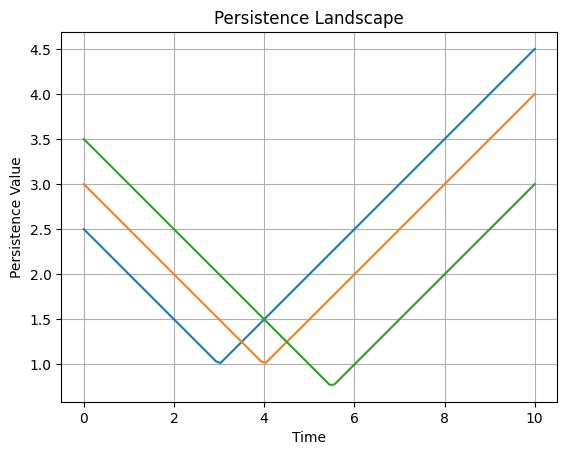

Kernel Density Estimation Result: [0.13435954 0.13600014 0.13774985 0.13081477 0.14108121 0.13551981
 0.14083966 0.13149865 0.14388123 0.12423609 0.13183073 0.1358516
 0.14529441 0.11893396 0.13935568 0.12582572 0.13502795 0.13826021
 0.12620967 0.12967839 0.14244392 0.13027105 0.14157288 0.12984904
 0.13490264 0.13011425 0.14191626 0.12923287 0.14142939 0.13024809
 0.13943557 0.13055057 0.12807611 0.13985312 0.14446136 0.14196974
 0.12898396 0.14327136 0.13744152 0.13271313 0.13606289 0.13759459
 0.14352287 0.14253122 0.13046865 0.1416857  0.13136972 0.13063416
 0.1353109  0.14220811 0.13177658 0.14572578 0.13159995 0.132206
 0.1370747  0.13400541 0.1364936  0.13380244 0.13292143 0.13142386
 0.14301185 0.1349476  0.13118469 0.13839127 0.1408917  0.13692406
 0.13171708 0.13046795 0.13013546 0.14300045 0.11922417 0.1327175
 0.13636617 0.11922521 0.1323831  0.14512988 0.13132483 0.12584276
 0.13171558 0.14554558 0.1449981  0.12675141 0.14336201 0.12160922
 0.14570041 0.12993293 0.1373907

In [13]:
# Example usage
barcode_sample = [(1, 5), (2, 6), (4, 7)]
landscapes = persistence_landscape(barcode_sample)
visualize_persistence_landscape(landscapes, 0, 10)

data_sample = np.random.rand(100, 2)
kde_result = kernel_density_estimation(data_sample, bandwidth=1.0)

bootstrap_diagrams = bootstrap_persistence_diagrams(data_sample, num_samples=10)

X_sample = np.random.rand(100, 5)
Y_sample = np.random.rand(100)
regression_coeffs = regression_with_topological_predictors(X_sample, Y_sample)

print("Kernel Density Estimation Result:", kde_result)
print("Regression Coefficients:", regression_coeffs)

In [14]:
import numpy as np
from scipy.stats import zscore
from statsmodels.tsa.stattools import coint

def latency_function(T, alpha, beta, tau, delta):
    """
    Calculate the latency function.
    :param T: Time or some latency affecting variable.
    :param alpha, beta, tau: Parameters affecting latency.
    :param delta: Additive noise term.
    :return: Latency value.
    """
    latency = sum(
        alpha_i / (1 + np.exp(-beta_i * (T - tau_i)))
        for alpha_i, beta_i, tau_i in zip(alpha, beta, tau)
    )
    return latency + delta

def transaction_volume(lambda_t, delta_t, epsilon_t):
    """
    Calculate transaction volume.
    :param lambda_t: Rate of volume arrival process.
    :param delta_t: Time interval.
    :param epsilon_t: Noise.
    :return: Transaction volume.
    """
    return lambda_t * delta_t + epsilon_t

def spread(A_t, B_t):
    """
    Calculate the spread between ask and bid prices.
    :param A_t: Ask price.
    :param B_t: Bid price.
    :return: Spread.
    """
    return A_t - B_t

def arbitrage_opportunity(P1, P2):
    """
    Determine if an arbitrage opportunity exists.
    :param P1: Price in market 1.
    :param P2: Price in market 2.
    :return: Boolean indicating arbitrage.
    """
    return P1 > P2

def statistical_arbitrage_trading_signals(X_t):
    """
    Identify statistical arbitrage signals from market data.
    :param X_t: Market data time series.
    :return: Identified trading signals.
    """
    signals = []
    zscored = zscore(X_t)

    for i in range(len(zscored) - 1):
        # Compute the z-scored difference
        diff = zscored[i] - zscored[i + 1]
        # Identify significant deviations
        if abs(diff) > 2:
            signal = 'buy' if diff < 0 else 'sell'
            signals.append({'pair': (i, i + 1), 'signal': signal})

    return signals

In [15]:
# Example execution
# Latency calculation
T = 10
alpha = [1, 2, 3]
beta = [0.5, 0.3, 0.1]
tau = [5, 10, 15]
delta = 0.05
latency = latency_function(T, alpha, beta, tau, delta)
print("Latency:", latency)

# Transaction volume
lambda_t = 100
delta_t = 1
epsilon_t = np.random.randn()
volume = transaction_volume(lambda_t, delta_t, epsilon_t)
print("Transaction Volume:", volume)

# Spread calculation
A_t = 105
B_t = 102
spread_value = spread(A_t, B_t)
print("Spread:", spread_value)

# Arbitrage opportunity
P1 = 101
P2 = 99
arbitrage = arbitrage_opportunity(P1, P2)
print("Arbitrage Opportunity:", "Yes" if arbitrage else "No")

# Statistical arbitrage signals
X_t = np.random.randn(100)  # Simulated market data
signals = statistical_arbitrage_trading_signals(X_t)
print("Trading Signals:", signals)

Latency: 3.106763826373193
Transaction Volume: 101.51108019513514
Spread: 3
Arbitrage Opportunity: Yes
Trading Signals: [{'pair': (5, 6), 'signal': 'buy'}, {'pair': (6, 7), 'signal': 'sell'}, {'pair': (12, 13), 'signal': 'buy'}, {'pair': (15, 16), 'signal': 'sell'}, {'pair': (16, 17), 'signal': 'buy'}, {'pair': (41, 42), 'signal': 'sell'}, {'pair': (42, 43), 'signal': 'buy'}, {'pair': (50, 51), 'signal': 'buy'}, {'pair': (59, 60), 'signal': 'buy'}, {'pair': (70, 71), 'signal': 'buy'}, {'pair': (78, 79), 'signal': 'buy'}, {'pair': (81, 82), 'signal': 'sell'}, {'pair': (82, 83), 'signal': 'sell'}, {'pair': (83, 84), 'signal': 'buy'}, {'pair': (91, 92), 'signal': 'buy'}]


In [16]:
import numpy as np

def order_book_imbalance(B, A):
    """
    Calculate the order book imbalance.
    :param B: Total volume of buy orders.
    :param A: Total volume of sell orders.
    :return: Imbalance value.
    """
    return (B - A) / (B + A)

def price_discovery_ecm(P_star, P_prev, alpha, epsilon):
    """
    Calculate price adjustment using the Error Correction Model (ECM).
    :param P_star: Equilibrium price.
    :param P_prev: Previous price.
    :param alpha: Adjustment coefficient.
    :param epsilon: Stochastic error term.
    :return: Price adjustment.
    """
    return alpha * (P_star - P_prev) + epsilon

def bid_ask_spread(A, B):
    """
    Calculate the bid-ask spread.
    :param A: Best ask price.
    :param B: Best bid price.
    :return: Spread value.
    """
    return A - B

def liquidity_impact(q, kappa):
    """
    Calculate the liquidity impact of a trade.
    :param q: Quantity of the trade.
    :param kappa: Market state parameter.
    :return: Liquidity impact.
    """
    return kappa * np.sqrt(q)

def implicit_transaction_cost(I, S):
    """
    Calculate implicit transaction cost.
    :param I: Liquidity impact.
    :param S: Slippage.
    :return: Implicit cost.
    """
    return I + S

def acd_time_intervals(tau, omega, alpha, beta, p, q):
    """
    Calculate durations using the Autoregressive Conditional Duration (ACD) model.
    :param tau: Time intervals between trades.
    :param omega: Constant mean duration.
    :param alpha: Parameter list for lagged durations.
    :param beta: Parameter list for past forecast errors.
    :param p: Number of past durations.
    :param q: Number of past forecast errors.
    :return: Modeled durations.
    """
    psi = omega
    for j in range(p):
        psi += alpha[j] * tau[-(j + 1)]
    for k in range(q):
        psi += beta[k] * (tau[-(k + 1)] - psi)
    return psi

def realized_volatility(log_returns):
    """
    Calculate realized volatility.
    :param log_returns: Log-return increments.
    :return: Realized volatility.
    """
    return np.sum(np.square(log_returns))

In [17]:
# Example Usage
B = 1200  # Buy volume
A = 1000  # Sell volume
P_star = 100  # Equilibrium price
P_prev = 98  # Previous price
alpha = 0.5  # Adjustment coefficient
epsilon = 0.1  # Stochastic error
ask_price = 105
bid_price = 103
trade_quantity = 150
kappa = 0.1
slippage = 0.05

# Order Book Imbalance
imbalance = order_book_imbalance(B, A)
print("Order Book Imbalance:", imbalance)

# Price Discovery ECM
price_adjustment = price_discovery_ecm(P_star, P_prev, alpha, epsilon)
print("Price Adjustment:", price_adjustment)

# Bid-Ask Spread
spread = bid_ask_spread(ask_price, bid_price)
print("Bid-Ask Spread:", spread)

# Liquidity Impact and Implicit Transaction Cost
liquidity_cost = liquidity_impact(trade_quantity, kappa)
implicit_cost = implicit_transaction_cost(liquidity_cost, slippage)
print("Liquidity Cost:", liquidity_cost)
print("Implicit Transaction Cost:", implicit_cost)

# ACD Modeled Duration
tau = [0.5, 0.6, 0.7, 0.8, 0.9]  # Past trade durations
acd_duration = acd_time_intervals(tau, 0.1, [0.2], [0.3], 1, 1)
print("ACD Modeled Duration:", acd_duration)

# Realized Volatility
log_returns = np.random.normal(0, 1, 100)  # Simulated log-returns
volatility = realized_volatility(log_returns)
print("Realized Volatility:", volatility)

Order Book Imbalance: 0.09090909090909091
Price Adjustment: 1.1
Bid-Ask Spread: 2
Liquidity Cost: 1.2247448713915892
Implicit Transaction Cost: 1.2747448713915892
ACD Modeled Duration: 0.466
Realized Volatility: 102.6500955389273


In [18]:
import numpy as np
import pandas as pd

def compute_latency(processing_time, network_delay, io_time):
    """
    Compute total latency.
    :param processing_time: Time taken for processing.
    :param network_delay: Delay due to networking.
    :param io_time: Time for I/O operations.
    :return: Total latency.
    """
    return processing_time + network_delay + io_time

def preprocess_data(data, parameters):
    """
    Preprocess raw data.
    :param data: Raw streaming data.
    :param parameters: Preprocessing parameters.
    :return: Processed data.
    """
    # Example transformation: scaling and removing outliers
    scaler = parameters.get('scaler', lambda x: x)  # Default scaler is identity
    threshold = parameters.get('threshold', np.inf)  # Default threshold is infinity

    try:
        processed_data = scaler(data)
        return processed_data[processed_data < threshold]
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return pd.Series([])

def extract_price_change(price_series, delta_t):
    """
    Calculate price change over time.
    :param price_series: Series of prices.
    :param delta_t: Time interval.
    :return: Price change series.
    """
    return price_series.diff(periods=delta_t)

def streaming_statistical_model(features, model_parameters):
    """
    Apply statistical model to streaming data.
    :param features: Extracted features.
    :param model_parameters: Parameters of the model.
    :return: Model predictions.
    """
    weights = model_parameters.get('weights', [0])
    bias = model_parameters.get('bias', 0)

    features = np.array(features).reshape(-1, len(weights))
    return np.dot(features, weights) + bias

def ema_algorithm(price_series, alpha):
    """
    Compute Exponential Moving Average (EMA).
    :param price_series: Series of prices.
    :param alpha: Smoothing factor.
    :return: EMA of price series.
    """
    if len(price_series) == 0:
        return np.array([])

    ema = [price_series.iloc[0]]  # Initialize with the first price
    for price in price_series.iloc[1:]:
        ema.append(alpha * price + (1 - alpha) * ema[-1])
    return np.array(ema)

def ai_integration(features, weights, theta):
    """
    Integrate AI model for predictions.
    :param features: Input features.
    :param weights: Model weights.
    :param theta: Model parameters.
    :return: Predicted value.
    """
    features = np.array(features)
    return np.dot(features, weights) + np.dot(features, theta)

In [19]:
# Example function calls with dummy data
# Replace with real data and parameters in practical scenarios
latency = compute_latency(5, 2, 1)

data = pd.Series([100, 102, 101, 103, 104])
processed_data = preprocess_data(data, {'scaler': np.log, 'threshold': 4.5})

price_change = extract_price_change(data, 1)

model_output = streaming_statistical_model(
    price_change.fillna(0),  # Handle NaN in price_change
    {'weights': [0.5], 'bias': 0.1}
)

ema = ema_algorithm(data, 0.1)

prediction = ai_integration([1, 2, 3], [0.1, 0.2, 0.3], [0.01, 0.02, 0.03])

# Output results
print("Total Latency:", latency)
print("Processed Data:", processed_data)
print("Price Change:", price_change)
print("Model Output:", model_output)
print("Exponential Moving Average:", ema)
print("AI Prediction:", prediction)

Total Latency: 8
Processed Data: Series([], dtype: float64)
Price Change: 0    NaN
1    2.0
2   -1.0
3    2.0
4    1.0
dtype: float64
Model Output: [ 0.1  1.1 -0.4  1.1  0.6]
Exponential Moving Average: [100.     100.2    100.28   100.552  100.8968]
AI Prediction: 1.54
